In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Inicializar algunas variables que después modificaremos.

In [2]:
hostnames = []
dataset = []
df = None

# 3. Crear una función para generar los hostnames en base a unas reglas (+1.5 puntos)

In [3]:
def set_hostnames(number_of_host: int) -> None: 
    hostname_prefix = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10 # Linux: 40% | Solaris: 30% |AIX: 20% |HP-UX: 10%
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 # Development: 10% | Integration: 10% | Testing: 25% | Staging: 25% | Production: 30%
    paises = ['NOR']*6 + ['FRA']*9 +['ITA']*16 +['ESP']*16 + ['DEU']*23 + ['IRL']*30 # Norway: 6% | France: 9% | Italy: 16% | Spain: 16% | Germany: 23% | Ireland: 30%
    grupo_alpha = [] # control de la parte alfabetica

    for i in range(number_of_host):
        hostname = random.choice(hostname_prefix) + random.choice(entorno) + random.choice(paises)
        grupo_alpha.append(hostname)
        hostname +=str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

# 4. Crear una función para obtener el nombre del SO. (+0.5 puntos)

In [4]:
def get_os(hostname: str):
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

# 5. Crear una función para obtener el nombre del entorno. (+0.5 puntos)

In [5]:
def get_environment(hostname: str)-> str:
    hostname_environment = hostname[1]
    
    if hostname_environment == 'D':
        return 'Development'
    elif hostname_environment == 'I':
        return 'Integration'
    elif hostname_environment == 'T':
        return 'Testing'
    elif hostname_environment == 'S':
        return 'Staging'
    elif hostname_environment == 'P':
        return 'Production'
    else:
        return 'Unknow'

# 6. Crear una función para obtener el nombre del país. (+0.5 puntos)

In [6]:
def get_country(hostname:str) -> str:
    hostname_country = hostname[2:5]

    if hostname_country == 'NOR':
        return 'Norway'
    elif hostname_country == 'FRA':
        return 'France'
    elif hostname_country == 'ITA':
        return 'Italy'
    elif hostname_country == 'ESP':
        return 'Spain'
    elif hostname_country == 'DEU':
        return 'Germany'
    elif hostname_country == 'IRL':
        return 'Ireland'
    else:
        return 'Unknow'

# 7. Crear una función para generar el DataFrame. (+1 punto)

In [7]:
def set_dataframe(count:int)-> None:
    global df

    set_hostnames(count)

    for codigo in hostnames:
        dataset.append({
            'hostname': codigo,
            'os':get_os(codigo),
            'environment': get_environment(codigo),
            'country': get_country(codigo),
            'node': int(codigo[-3:])
        })

    df = pd.DataFrame(dataset)    

# 8. Crear el DataFrame. (+0.2 puntos)

In [8]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,HTIRL001,HP-UX,Testing,Ireland,1
1,LPESP001,Linux,Production,Spain,1
2,SSIRL001,Solaris,Staging,Ireland,1
3,SPDEU001,Solaris,Production,Germany,1
4,HPIRL001,HP-UX,Production,Ireland,1
...,...,...,...,...,...
1495,SPIRL033,Solaris,Production,Ireland,33
1496,LPNOR013,Linux,Production,Norway,13
1497,ASDEU019,AIX,Staging,Germany,19
1498,ATDEU030,AIX,Testing,Germany,30


# 9. Guardar el DataFrame generado en un fichero CSV. (+0.5 puntos)

In [9]:
df.to_csv(
    'hosts.csv',
    header= True,
    index= False
)

df_hosts = pd.read_csv('hosts.csv')
df_hosts

,hostname,os,environment,country,node
0,HTIRL001,HP-UX,Testing,Ireland,1
1,LPESP001,Linux,Production,Spain,1
2,SSIRL001,Solaris,Staging,Ireland,1
3,SPDEU001,Solaris,Production,Germany,1
4,HPIRL001,HP-UX,Production,Ireland,1
...,...,...,...,...,...
1495,SPIRL033,Solaris,Production,Ireland,33
1496,LPNOR013,Linux,Production,Norway,13
1497,ASDEU019,AIX,Staging,Germany,19
1498,ATDEU030,AIX,Testing,Germany,30


# 10. Generar un único gráfico, agrupando para cada país (country) losentornos (environment). (+0.5 puntos)

<Axes: xlabel='country'>

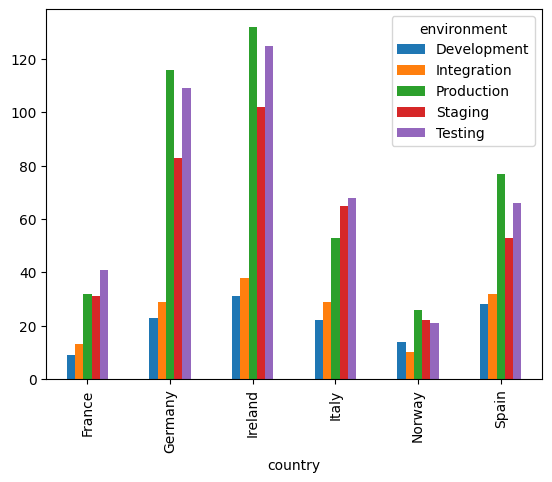

In [10]:
grafico = df.groupby(['country','environment']).size()
grafico.unstack().plot(kind='bar')

# 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas. (+4.5 puntos)

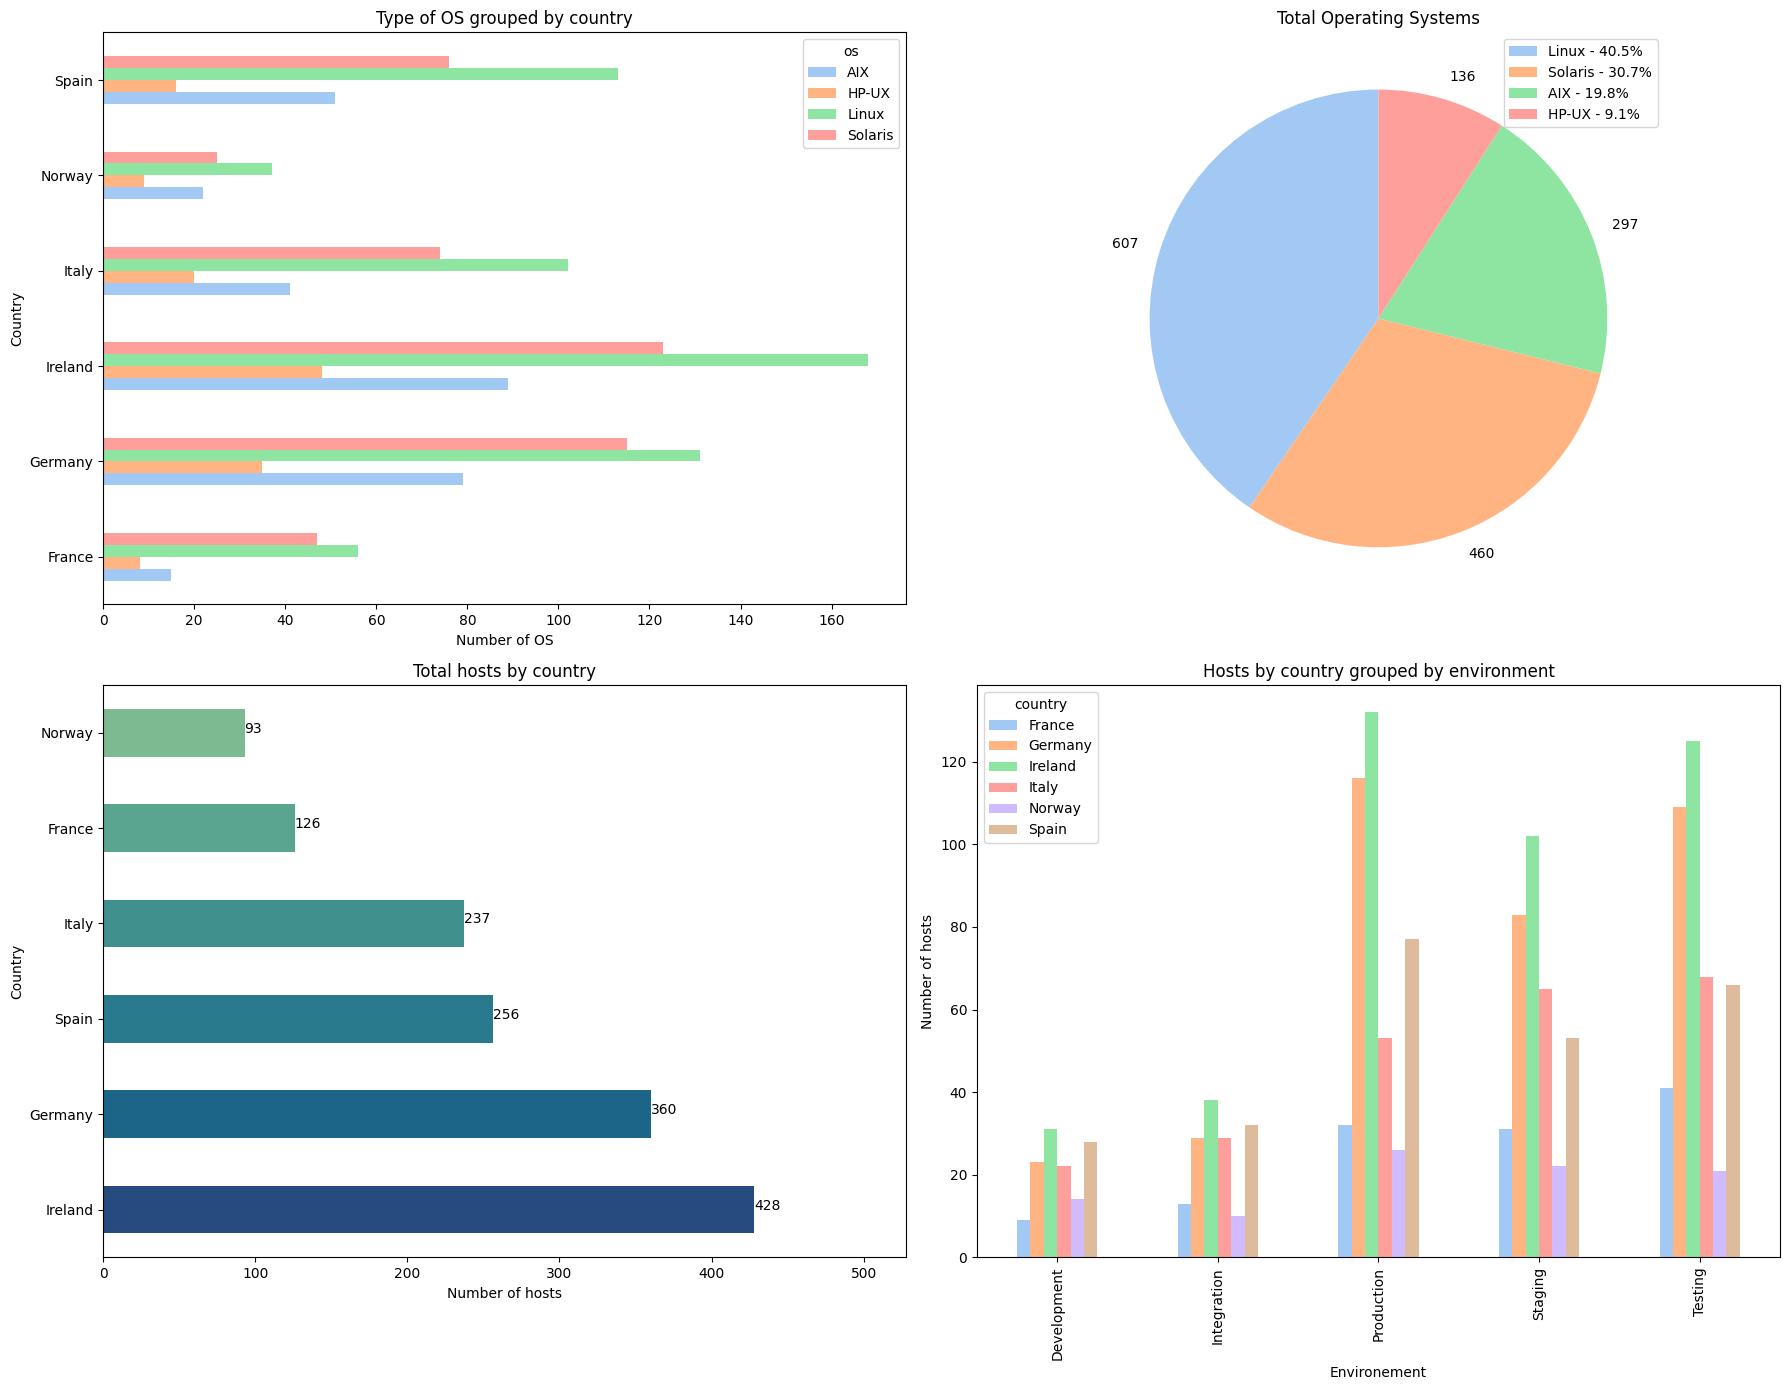

In [11]:
sns.set_palette('pastel')

fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# gráfico 1 de barras unstack:
grafico1 = df.groupby(['os','country']).size().unstack(0)
grafico1.plot(kind='barh', ax=axs[0,0])
axs[0, 0].set_title('Type of OS grouped by country')
axs[0, 0].set_xlabel('Number of OS')
axs[0, 0].set_ylabel('Country')

# grafico 2 de tarta:
grafico2 = df['os'].value_counts()
axs[0, 1].pie(grafico2, labels=grafico2, startangle=90) 
axs[0, 1].set_title('Total Operating Systems')
axs[0, 1].legend(grafico2.index + ' - ' + (grafico2/grafico2.sum()*100).round(1).astype(str) + '%', loc='upper right')

# grafico 3  barras horizantales
grafico3 = df['country'].value_counts()
degradado = sns.color_palette('crest', len(grafico3))
degradado = degradado[::-1]
grafico3.plot(kind= 'barh', ax=axs[1,0], color=degradado)

axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')

#total de hosts por paises en el grafico
for index, value in enumerate(grafico3):
    axs[1, 0].text(value, index, str(value))

#ajuste del eje de las x +100
axs[1, 0].set_xlim(0, grafico3.max() + 100)

# grafico 4 barras

grafico4 = df.groupby(['country','environment']).size()
grafico4.unstack(0).plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by environment')
axs[1, 1].set_xlabel('Environement')
axs[1, 1].set_ylabel('Number of hosts')


fig.tight_layout() #arregla la ilustracion del grafico
